<a href="https://colab.research.google.com/github/pantslegs/video-game-sales/blob/main/vgsales-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Gathering**

The dataset used for the project is Video Game Sales or "vgsales.csv". It was taken from Kaggle.com, an online source for multiple notebooks and datasets. The dataset was chosen due to the relevance of video games to the people in the current time. It was also chosen because of its contents, the data was cleanly divided and arranged. Moreover, it is the group's interest in handling a dataset relating to games.

# **Cleansing Data**

The first step in handling a dataset is to clean unnecessary values that is not in line of the objective. Filtering certain data will allow us to only manipulate relevant data. For the dataset that was acquired, the data was straightforward. However, we have chosen to remove years before 2000 as it will not be used for analyzing and modelling. Additionally, values in line to the year of 2016 are incomplete resulting in being dropped. Cells that does not contain any values are also disregarded in case it will be necessary for the succeeding procedures.

In [ ]:
#imports

import os
import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import express as px
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

In [ ]:
#upload the dataset

from google.colab import files
upload = files.upload()
vgsales = pd.read_csv("vgsales.csv")

Saving vgsales.csv to vgsales (6).csv


In [ ]:
vgsales

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,2,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,3,6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,4,7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14000,14000,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
14001,14001,16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
14002,14002,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
14003,14003,16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
#drop incomplete and unnecessary rows from 2016

drop_row_index = vgsales[vgsales['Year'] > 2015].index
vgsales = vgsales.drop(drop_row_index)

In [ ]:
#remove NaN data from column Year
vgsales = vgsales[vgsales.Year.notnull()]

#remove unnecessary years
vgsales = vgsales.loc[vgsales.Year > 1999]

#convert Year to data type integer from float
vgsales.Year = vgsales['Year'].astype(int)

In [ ]:
#check for the datatype change for Year from float to int

vgsales.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Rank              int64
Name             object
Console          object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
#rename Platform to Consoles

vgsales = vgsales.rename(columns = {'Platform' : 'Console'})

In [ ]:
#validate new column name

vgsales.head(5)

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,2,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,3,6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,4,7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [ ]:
vgsales.to_csv('vgsales.csv')
from google.colab import files
files.download("vgsales.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis**

On this portion of the code, the dataset is finally cleansed. The following code blocks will examine the contents of the dataframe. For the first code blocks, it displays matrix tables that allows the reader or the researchers for a better understanding of desired variables and values. The tables also show the dataset's features indicated in the info() segment. The latter part of this section will display visualization of data and its relation to other datas to simplify and identify patterns and trends of the dataset.




**Problem Statement**

The main goal of the project is to find out if people from the 2000s are truly interested in video games. The data science questions that will help solve the problem involves, (1) learning how much do video games sell, (2) finding out what genre of games are most popular based on sales, (3) and predicting whether all genres of video games will continue to be made and sold.

In [ ]:
#info of the dataframe
### FOLLOWING ARE DETAILS OF COLUMNS ###

# Rank - ranking of overall sales ; int
# Name - names of the games ; object
# Console - console used ; object
# Year - release of the game  ; float -> int
# Genre - game genre  ; object
# Publisher - company of the game ; object
# ALL SALES (NA, EU, JP, Other_Sales) - in millions ; float
# Global_sales - total worldwide sales  ; float

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14005 entries, 0 to 14004
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14005 non-null  int64  
 1   Unnamed: 0.1  14005 non-null  int64  
 2   Rank          14005 non-null  int64  
 3   Name          14005 non-null  object 
 4   Console       14005 non-null  object 
 5   Year          14005 non-null  int64  
 6   Genre         14005 non-null  object 
 7   Publisher     13971 non-null  object 
 8   NA_Sales      14005 non-null  float64
 9   EU_Sales      14005 non-null  float64
 10  JP_Sales      14005 non-null  float64
 11  Other_Sales   14005 non-null  float64
 12  Global_Sales  14005 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.5+ MB


In [ ]:
#display the first 5 lines of the DF

vgsales.head()

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,2,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,3,6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,4,7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [ ]:
#display the last 5 lines of the DF

vgsales.tail()

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14000,14000,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
14001,14001,16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
14002,14002,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
14003,14003,16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
14004,14004,16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#all data from the DF
#total rows x columns

vgsales.head

<bound method NDFrame.head of        Unnamed: 0  Unnamed: 0.1   Rank  ... JP_Sales Other_Sales  Global_Sales
0               0             0      1  ...     3.77        8.46         82.74
1               1             2      3  ...     3.79        3.31         35.82
2               2             3      4  ...     3.28        2.96         33.00
3               3             6      7  ...     6.50        2.90         30.01
4               4             7      8  ...     2.93        2.85         29.02
...           ...           ...    ...  ...      ...         ...           ...
14000       14000         16593  16596  ...     0.00        0.00          0.01
14001       14001         16594  16597  ...     0.00        0.00          0.01
14002       14002         16595  16598  ...     0.00        0.00          0.01
14003       14003         16596  16599  ...     0.00        0.00          0.01
14004       14004         16597  16600  ...     0.00        0.00          0.01

[14005 rows x 13 colu

In [ ]:
vgsales.describe()

,Unnamed: 0,Unnamed: 0.1,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000
mean,7002.000000,8462.503177,8464.618279,2007.743377,0.249820,0.147682,0.056818,0.051888,0.506505
std,4043.039595,4771.759175,4772.040765,3.891558,0.724338,0.519970,0.252405,0.202540,1.486804
min,0.000000,0.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3501.000000,4332.000000,4334.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,7002.000000,8533.000000,8535.000000,2008.000000,0.080000,0.020000,0.000000,0.010000,0.160000
75%,10503.000000,12595.000000,12597.000000,2011.000000,0.230000,0.110000,0.030000,0.040000,0.450000
max,14004.000000,16597.000000,16600.000000,2015.000000,41.490000,29.020000,6.500000,10.570000,82.740000


In [ ]:
vgsales.describe(include = "all")

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14005.000000,14005.000000,14005.000000,14005,14005,14005.000000,14005,13971,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000
unique,NaN,NaN,NaN,9438,20,NaN,12,445,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12,2131,NaN,2905,1211,NaN,NaN,NaN,NaN,NaN
mean,7002.000000,8462.503177,8464.618279,NaN,NaN,2007.743377,NaN,NaN,0.249820,0.147682,0.056818,0.051888,0.506505
std,4043.039595,4771.759175,4772.040765,NaN,NaN,3.891558,NaN,NaN,0.724338,0.519970,0.252405,0.202540,1.486804
min,0.000000,0.000000,1.000000,NaN,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3501.000000,4332.000000,4334.000000,NaN,NaN,2005.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,7002.000000,8533.000000,8535.000000,NaN,NaN,2008.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.160000
75%,10503.000000,12595.000000,12597.000000,NaN,NaN,2011.000000,NaN,NaN,0.230000,0.110000,0.030000,0.040000,0.450000


In [ ]:
vgsales.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
Rank             0
Name             0
Console          0
Year             0
Genre            0
Publisher       34
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
#shape of the dataset

vgsales.shape

(14005, 13)

In [ ]:
#unique values of each columns

vgsales.nunique()

Unnamed: 0      14005
Unnamed: 0.1    14005
Rank            14005
Name             9438
Console            20
Year               16
Genre              12
Publisher         445
NA_Sales          362
EU_Sales          287
JP_Sales          184
Other_Sales       156
Global_Sales      563
dtype: int64

In [ ]:
vgsales.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Rank', 'Name', 'Console', 'Year',
       'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [ ]:
vgsales.sample(20)

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4868,4868,6013,6015,Hamster Club 4: Shigessa Daidassou,GBA,2003,Simulation,Jorudan,0.00,0.00,0.28,0.01,0.29
3471,3471,4297,4299,Hyperdimension Neptunia,PS3,2010,Role-Playing,Tecmo Koei,0.22,0.11,0.07,0.05,0.46
1812,1812,2325,2327,Call of Juarez: Bound in Blood,PS3,2009,Shooter,Ubisoft,0.35,0.38,0.01,0.16,0.89
8245,8245,9980,9982,ASH: Archaic Sealed Heat,DS,2007,Role-Playing,Nintendo,0.00,0.00,0.12,0.00,0.12
1814,1814,2327,2329,Madden NFL 08,Wii,2007,Sports,Electronic Arts,0.82,0.01,0.00,0.07,0.89
12191,12191,14550,14553,Pimp My Ride: Street Racing,DS,2009,Racing,Activision,0.03,0.00,0.00,0.00,0.03
1811,1811,2324,2326,Madagascar,GBA,2005,Platform,Activision,0.62,0.24,0.00,0.03,0.89
8122,8122,9833,9835,Mytran Wars,PSP,2009,Strategy,Deep Silver,0.08,0.02,0.00,0.02,0.12
11604,11604,13875,13877,Shonen Jump's One Piece: Grand Adventure,GC,2006,Fighting,Namco Bandai Games,0.03,0.01,0.00,0.00,0.04
13381,13381,15894,15897,Antz Extreme Racing,XB,2002,Racing,Empire Interactive,0.01,0.00,0.00,0.00,0.02


**Ranking Based on Genre, Publisher, Console**

In [ ]:
#popular genre of games in descending order

vgsales['Genre'].value_counts()

Action          2905
Sports          1939
Misc            1568
Role-Playing    1248
Adventure       1143
Shooter         1083
Racing          1015
Simulation       752
Platform         708
Fighting         625
Strategy         538
Puzzle           481
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

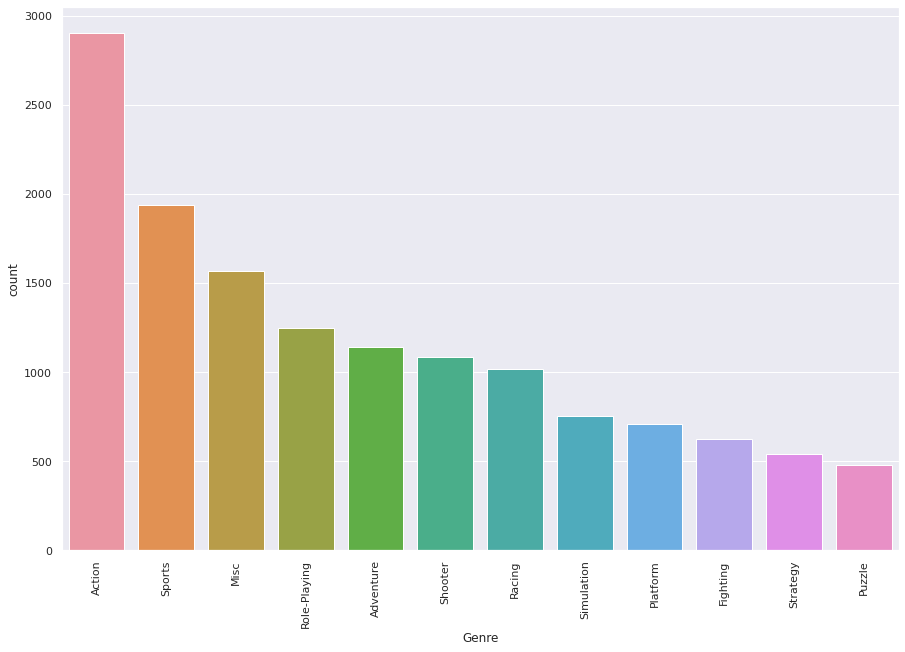

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Genre", data = vgsales, order = vgsales['Genre'].value_counts().index)
plt.xticks(rotation = 90)

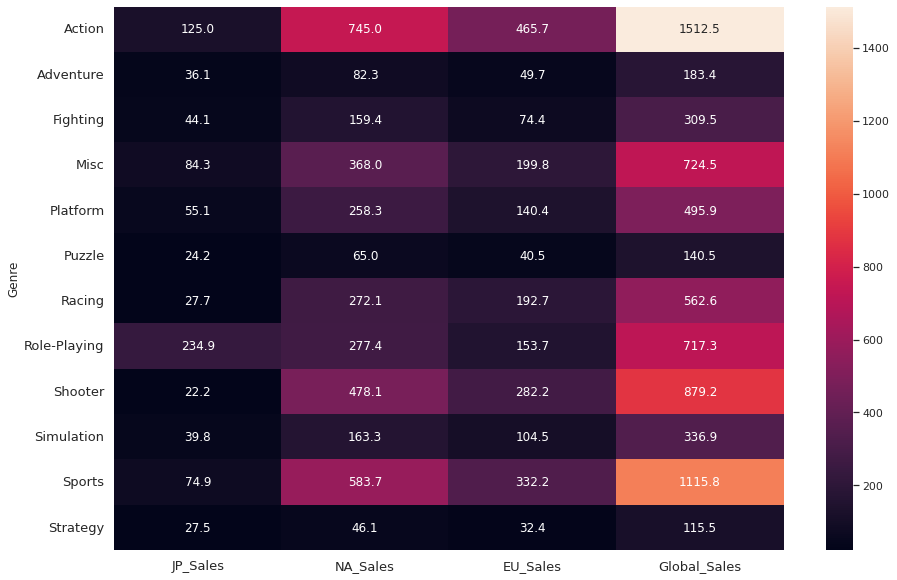

In [ ]:
#LOCATION: a heatmap that displays each regional and global sales of each genre

compare = vgsales[['Genre', 'JP_Sales', 'NA_Sales', 'EU_Sales', 'Global_Sales']]
compare_map1 = compare.groupby(by = ['Genre']).sum()

plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(compare_map1, annot = True, fmt = '.1f')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

Text(0.5, 1.0, 'Global Sales of Games Released from 2000 to 2016 by Genre')

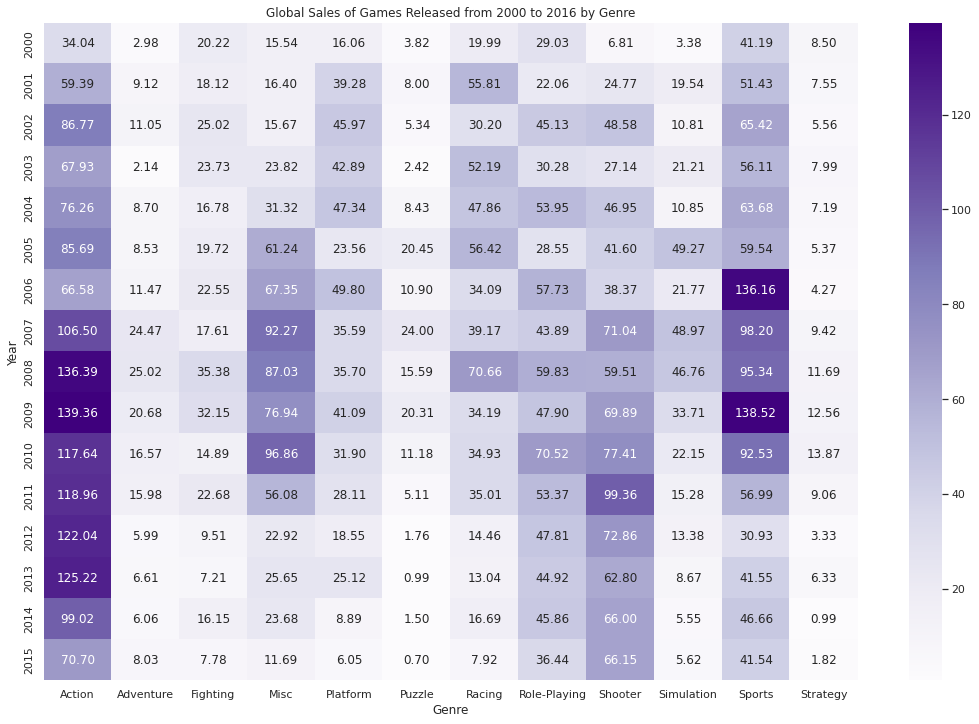

In [ ]:
#YEAR: a heatmap that displays the global sales of each genre from 2000 to 2016

SalesGY = pd.pivot_table(vgsales, index = ['Year'], columns = ['Genre'], values = ['Global_Sales'], aggfunc = np.sum)
SalesGY.columns = SalesGY.columns.get_level_values(1)

plt.figure(figsize = (15, 10))
sns.heatmap(SalesGY, annot = True, fmt = '.2f', cmap = 'Purples')
plt.tight_layout()
plt.ylabel('Year')
plt.xlabel('Genre')
plt.title('Global Sales of Games Released from 2000 to 2016 by Genre')

In [ ]:
#popular game platforms in descending order

vgsales['Console'].value_counts()

DS      2131
PS2     2127
Wii     1290
PS3     1272
X360    1227
PSP     1197
PC       865
GBA      811
XB       803
GC       542
3DS      465
PSV      350
PS       273
PS4      228
XOne     159
WiiU     133
N64       70
DC        31
GB        27
WS         4
Name: Console, dtype: int64

In [ ]:
BConsole = vgsales.Console.value_counts().sort_values()
BConsole

fig = px.line(BConsole, title = 'Most Used Consoles', labels = {'value':'Sum' , 'index':'Console'})
fig.show()

In [ ]:
#popular game publisher in descending order

vgsales['Publisher'].value_counts()

Electronic Arts                 1211
Activision                       896
Ubisoft                          885
Namco Bandai Games               800
Konami Digital Entertainment     690
                                ... 
Marvel Entertainment               1
Pioneer LDC                        1
Phantagram                         1
The Learning Company               1
Rain Games                         1
Name: Publisher, Length: 445, dtype: int64

In [ ]:
BPublisher = vgsales.Publisher.value_counts().sort_values()
BPublisher

fig = px.line(BPublisher, title = 'Top Publisher', labels = {'value':'Sum' , 'index':'Publisher'})
fig.show()

# **Modelling Phase**

The project's goal was to employ data science questions to answer broad questions about the problem, which is fairly significant. The years 2000 and onwards specifically were chosen solely to really demonstrate relevance to the for all intents and purposes present time, as the years 1999 and prior basically were not relevant and mostly contained too fairly many unstable factors in a subtle way. Using linear regression the data for global sales in each genre and every year was created to see a forecast on the trend on how each genre in video game sells. The regression coeff was displayed alongside the trend for the overall global sales of video games as the years go by to present how video game sales is doing and forecast whether it will continue to sell or not.


In [ ]:
#Use the data from year 2000 onwards only so that it remains relevant for forecast.
vgsales = vgsales.loc[vgsales.Year >= 2000]

#Finding the median sales value by genre and year
Med_Sales_by_Gen_and_Yr = pd.pivot_table(vgsales,index=['Year'],
columns=['Genre'],values=['Global_Sales'],aggfunc=np.median)
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)
Med_Sales_by_Gen_and_Yr.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2000,0.325,0.120,0.240,0.35,0.280,0.265,0.21,0.35,0.205,0.120,0.270,0.260
2001,0.270,0.180,0.470,0.28,0.280,0.160,0.25,0.19,0.200,0.315,0.270,0.095
2002,0.210,0.165,0.140,0.22,0.250,0.060,0.13,0.20,0.210,0.100,0.145,0.130
2003,0.185,0.130,0.275,0.25,0.210,0.095,0.12,0.25,0.150,0.340,0.260,0.080
2004,0.210,0.120,0.220,0.20,0.345,0.090,0.20,0.24,0.155,0.260,0.325,0.080


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.

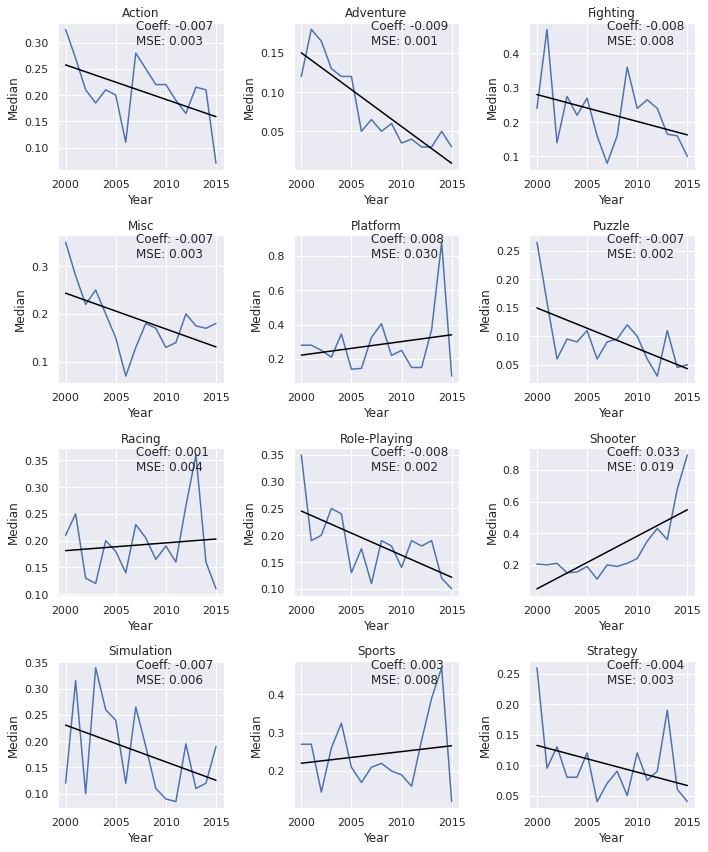

In [ ]:
#Regression Plot
def Linear_Regression_Plot(vgsales):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,12))
    x_data = np.transpose(np.matrix(vgsales.index))

    count = 0

    for genre in vgsales.columns:
        axs = axes[count//3,count%3]
        y_data = vgsales[genre].to_frame()

        #Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)

        #Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)

        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        vgsales[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()

        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2007,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()

    return [Regr_Coeff,Regr_MSE]

[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

In [ ]:
#Computing for the numerical value of Regression Coeff and MSE per genre
Linear_Regression_Results = pd.DataFrame({'Regression Coeff':Regr_Coeff, 'MSE':Regr_MSE}, index = list(Med_Sales_by_Gen_and_Yr.columns))
Column_Order = ['Regression Coeff','MSE']

#Printing the linear regression results in a table
Linear_Regression_Results[Column_Order].head(n=len(list(Med_Sales_by_Gen_and_Yr.columns)))

,Regression Coeff,MSE
Action,-0.006574,0.002597
Adventure,-0.009404,0.000556
Fighting,-0.007831,0.007762
Misc,-0.007493,0.002882
Platform,0.007897,0.030192
Puzzle,-0.007103,0.001845
Racing,0.001449,0.003724
Role-Playing,-0.008243,0.002121
Shooter,0.033331,0.018520
Simulation,-0.007000,0.005555


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Text(0, 0.5, 'Median Sales (in millions)')

<Figure size 936x360 with 0 Axes>

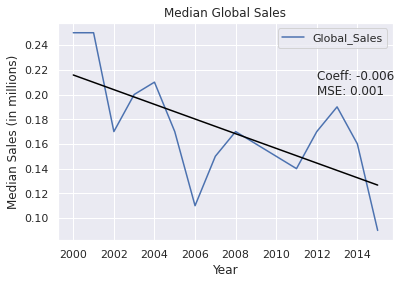

In [ ]:
#Plotting the overall global_sales relative to the year to see the trend
Med_Sales_by_Yr = pd.pivot_table(vgsales,index=['Year'],
                     values=['Global_Sales'],aggfunc=np.median)


fig = plt.figure(figsize=(13,5))
Med_Sales_by_Yr.plot()

x_data = np.transpose(np.matrix(Med_Sales_by_Yr.index))
y_data = Med_Sales_by_Yr
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)

plt.plot(x_data,regr.predict(x_data), color='black')

txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,np.mean((regr.predict(x_data)-y_data)**2))

plt.text(2012,0.8*Med_Sales_by_Yr.max(),txt)

plt.title('Median Global Sales')
plt.xlabel('Year')
plt.ylabel('Median Sales (in millions)')

# **Evaluation**

For this last section, we discuss our analysis from the exploratory phase and findings from the modelling phase.

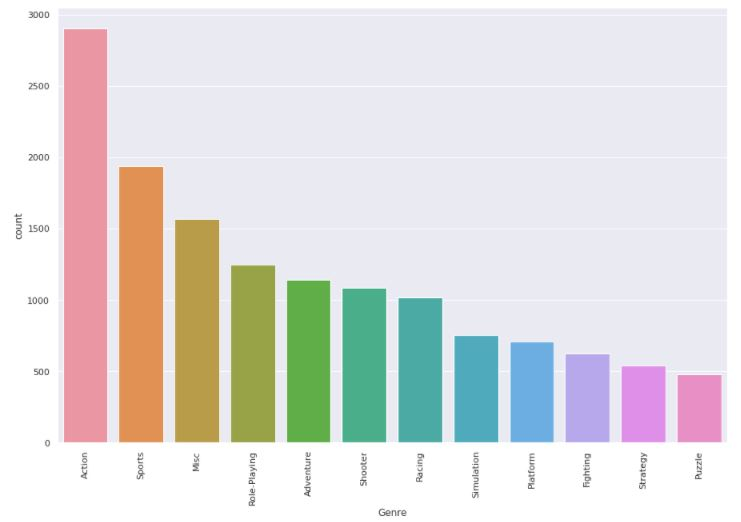

The bar graph above indicates that the most popular genre on global scale is **Action**.

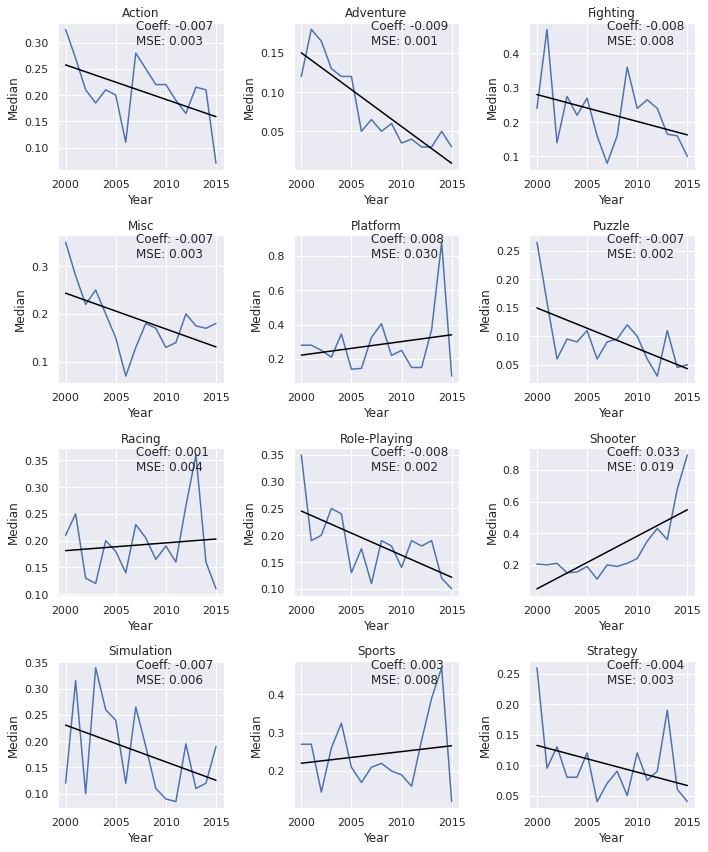



Despite Action being the most popular genre, it was in rapid decline for the recent years. Not only Action was in decline but also all genres except for Simulation and Shooter genre. Moreover, genre under the category of Misc. was gaining its recognition over the years.

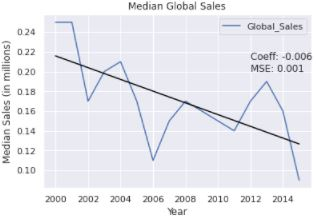

However, in our modelling phase, we found that the global sales were in decline from 2000 to 2014 for all genres including **Action**.

All genres of games have been in declining for the recent years with the exception of shooter games. Therefore, people who play games have a high demand for shooting games. It is possible that engagements and different flexibilities in shooting games became the trend. Considering the dataset with years from 1976 to 1999 - the gaming consoles used for that era had a lot of variety. However, in the modern world, only a certain amount of people use consoles for gaming. Besides, games today are company proprietary. However, leading publishers for shooting games implement the game into a platform that is commonly used such as smartphones, tablets, and computer. The global sales had decreased over the years but video games may be here to stay as the initial of video game sales before 2000 was mostly due to the technological advancement the world had, where only a few percentage of the population only had access to consoles that allowed them to play games. The trend may be downward but it can be seen that with all genres of video games, there has been consistent increase and decrease in demand which can be forecasted into the future years, it will be seen that video game sales per genre will continue to have peaks and lows depending on how much a game in a certain genre becomes popular.

# **Reference**

**Dataset:** [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales) from Kaggle



[Video Games Sales by Genre - Kendall Gillies](https://https://www.kaggle.com/kendallgillies/video-game-sales-by-genre/notebook#3.0-Conclusion)

[Video Game Sales EDA, Visualizations, ML Models](https://https://www.kaggle.com/vikasukani/video-game-sales-eda-visualizations-ml-models)

[Video game sales analysis and visualization](https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization/notebook#16.-Total-revenue-by-region)

[Video Game Sales Exploratory Data Analysis](https://www.kaggle.com/gulsahdemiryurek/video-game-sales-exploratory-data-analysis/notebook#-4.-Genre-and-Region)

[Video Games EDA and Visualization](https://https://www.kaggle.com/andreshg/video-games-eda-and-visualization#Pandas-Profiling-%F0%9F%94%8E)

[Working with MIssing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)

[How to Check If Any Value is NaN in a Pandas DataFrame](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)

[Building Sales Prediction Web Application using Macghine Learning Dataset](https://www.analyticsvidhya.com/blog/2020/08/building-sales-prediction-web-application-using-machine-learning-dataset/)

[20+ Data Science Project Ideas for Beginners with Source Code](https://www.projectpro.io/article/15-data-science-projects-for-beginners-with-source-code/343)

[6 Predictive Models Every Beginner Data Scientist should Master](https://towardsdatascience.com/6-predictive-models-models-every-beginner-data-scientist-should-master-7a37ec8da76d)

[Seven Major Steps for Building a Data Science Model](https://towardsdatascience.com/seven-major-steps-for-building-a-data-science-model-c1761408dd17)